In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])

# Map target values to species names
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows
print("First 5 rows of the dataset:")
print(iris_df.head())

# Explore the structure
print("\nDataset info:")
print(iris_df.info())

# Check for missing values
print("\nMissing values:")
print(iris_df.isnull().sum())

# Clean the dataset (though Iris dataset is already clean)
iris_df_clean = iris_df.dropna()  # This won't remove anything as there are no missing values

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0     0.0  setosa  
1     0.0  setosa  
2     0.0  setosa  
3     0.0  setosa  
4     0.0  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width 

In [4]:
# Basic statistics of numerical columns
print("\nBasic statistics:")
print(iris_df_clean.describe())

# Group by species and compute mean of numerical columns
print("\nMean measurements by species:")
print(iris_df_clean.groupby('species').mean())

# Additional interesting findings
print("\nInteresting findings:")
# Find which species has the longest petals on average
max_petal_length = iris_df_clean.groupby('species')['petal length (cm)'].mean().idxmax()
print(f"Species with longest petals on average: {max_petal_length}")

# Find the range of sepal widths
sepal_width_range = iris_df_clean['sepal width (cm)'].max() - iris_df_clean['sepal width (cm)'].min()
print(f"Range of sepal widths: {sepal_width_range:.2f} cm")


Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Mean measurements by species:
            sepal leng

C:\Users\Tidimalo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


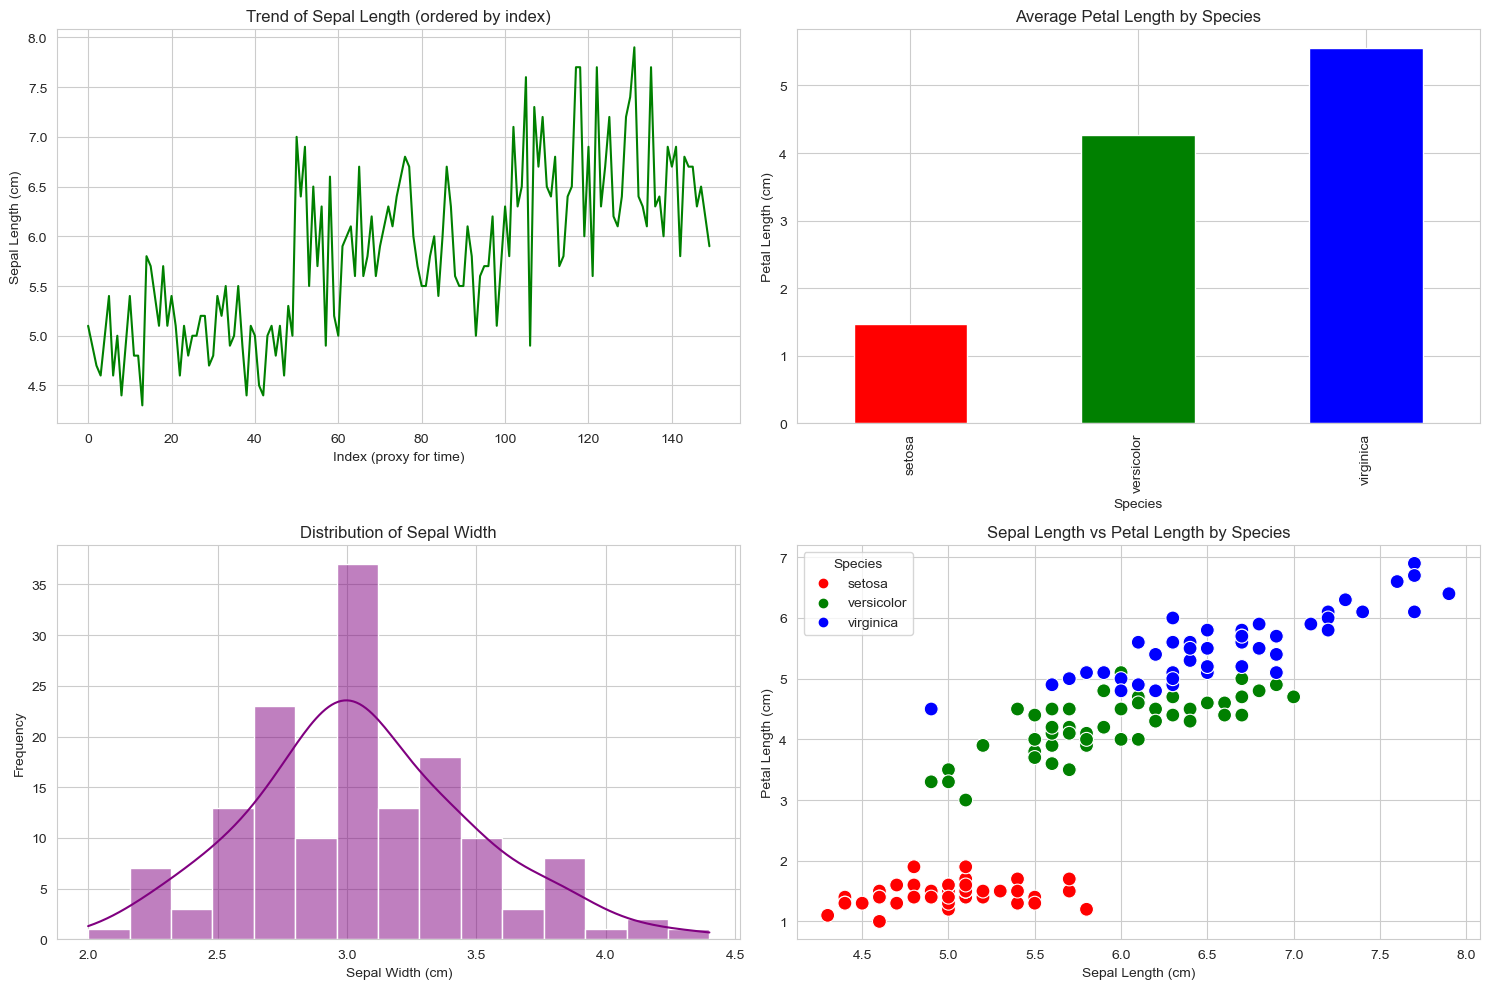

In [5]:
# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# 1. Line chart (simulating trends over time by using index as proxy)
plt.subplot(2, 2, 1)
iris_df_clean['sepal length (cm)'].plot(kind='line', color='green')
plt.title('Trend of Sepal Length (ordered by index)')
plt.xlabel('Index (proxy for time)')
plt.ylabel('Sepal Length (cm)')

# 2. Bar chart - average petal length per species
plt.subplot(2, 2, 2)
iris_df_clean.groupby('species')['petal length (cm)'].mean().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')

# 3. Histogram - distribution of sepal width
plt.subplot(2, 2, 3)
sns.histplot(iris_df_clean['sepal width (cm)'], bins=15, kde=True, color='purple')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

# 4. Scatter plot - sepal length vs petal length with species differentiation
plt.subplot(2, 2, 4)
sns.scatterplot(data=iris_df_clean, x='sepal length (cm)', y='petal length (cm)', hue='species', 
                palette=['red', 'green', 'blue'], s=100)
plt.title('Sepal Length vs Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')

plt.tight_layout()
plt.show()